# Task 8: Clustering with K-Means

### Objective: Perform unsupervised learning with K-Means clustering.

**Step 1**: Load and Visualize the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Show the first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Step 2**: Optional PCA for 2D View (Data Visualization)


I will visualize the dataset in 2D using PCA (Principal Component Analysis).
But first, let's select only the numerical features — we’ll drop the “CustomerID” and “Genre” columns.

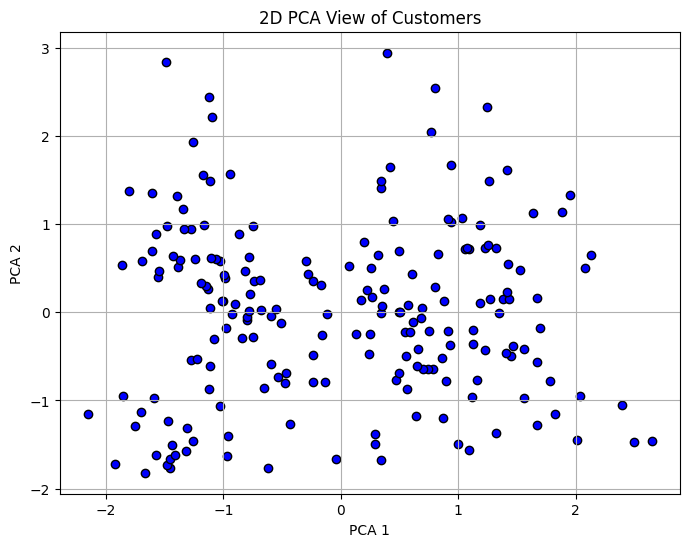

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Drop non-numeric columns
X = df.drop(["CustomerID", "Gender"], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolors='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2D PCA View of Customers')
plt.grid(True)
plt.show()

**Step 3**: Apply K-Means and Assign Cluster Labels


Now, i will perform K-Means clustering using Scikit-learn.

i will first try it with K=5 clusters (a common starting point), and later we'll find the best K using the Elbow Method.

In [4]:
from sklearn.cluster import KMeans

# Fit K-Means with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Show the first few rows with cluster labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


**Step 4**: Use the Elbow Method to Find Optimal K


The Elbow Method helps us find the best number of clusters by plotting the “inertia” (how tight the clusters are) for different values of K.

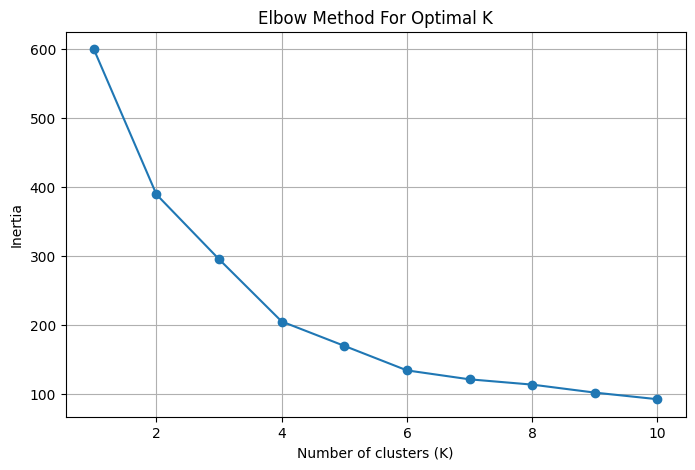

In [5]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()


✅ Optimal K = 5

The curve bends significantly at K = 5, and after that it flattens — confirming that 5 is the best number of clusters.

**Step 5**: Visualize Clusters with Color-Coding


Now that my data is clustered, let’s plot the clusters using the first two features: Annual Income and Spending Score.



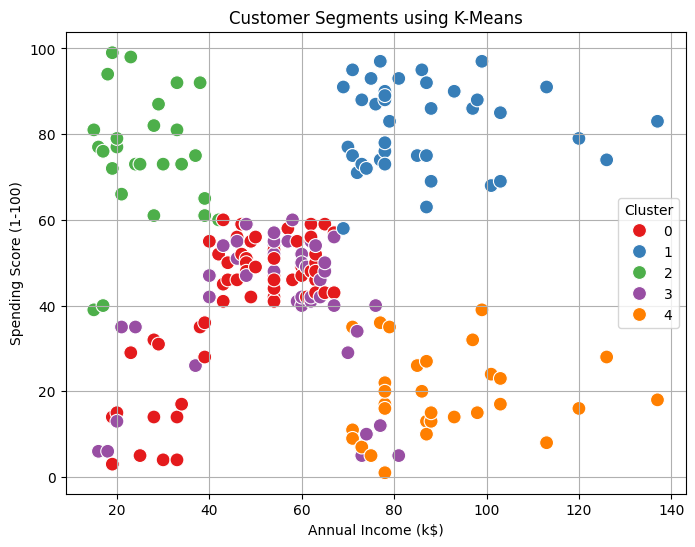

In [6]:
import seaborn as sns

# Plot clusters with different colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title("Customer Segments using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()


**Step 6**: Evaluate Clustering using Silhouette Score


Now let’s measure how well my clustering is performing using the Silhouette Score.



In [7]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.40846873777345605


What is Silhouette Score?

*  Ranges from -1 to 1

*  Closer to 1 = better clustering (points well matched to their own cluster)

*  Around 0 = overlapping clusters

*  Negative = bad clustering (wrong assignments)

my Silhouette Score: 0.408
This means:

*  my clustering is good ✅

*  It's not perfect, but it shows clear separation between most clusters

*  Since 0.408 is above 0.3, my K-Means result is meaningful and useful

i am in the “Good Clustering” zone, so no need to change K or features unless i want to experiment more.

So, Task 08 is done.